In [332]:
import pandas as pd
import numpy as np

invoice_df=pd.read_csv("OnlineRetail.csv",encoding='unicode_escape' )
invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [333]:
columns_to_drop = ['Description', 'UnitPrice']
invoice_df.drop(columns=columns_to_drop, inplace=True)

In [334]:
invoice_df['StockCode'].nunique()

4070

In [335]:
invoice_df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'CustomerID',
       'Country'],
      dtype='object')

In [336]:
inv_df = invoice_df.drop_duplicates()
inv_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,12680.0,France


In [337]:
prod_df=pd.read_csv("Product_Details.csv")
prod_df

,StockCode,Product,Img,Type,UnitPrice
0,85048,"""Samsung QN85Q900TS 85"" 8K Ultra High Definiti...",https://c1.neweggimages.com/ProductImageCompre...,Television,10595.98
1,79323P,Samsung QN85Q900TS 8K Ultra High Definition Sm...,https://c1.neweggimages.com/ProductImageCompre...,Television,10325.98
2,79323W,Samsung QN85Q900TS 8K Ultra High Definition Sm...,https://c1.neweggimages.com/ProductImageCompre...,Television,10275.98
3,22041,"SunBrite 75"" Outdoor TV 4K HDR - Signature 2 S...",https://c1.neweggimages.com/ProductImageCompre...,Television,9999.00
4,21232,"SunBrite 75"" Outdoor TV 4K HDR - Signature 2 S...",https://c1.neweggimages.com/ProductImageCompre...,Television,9999.00
...,...,...,...,...,...
4741,23562,duragadget professional tough versatile sturdy...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.86
4742,23561,Fujifilm Instax Mini 9 Instant Camera - Flamin...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.71
4743,23609,[ Original Authorized ] Ordro V12 FHD 1080P 3 ...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.59
4744,23617,gear pro sports action camera - hd 1080p mini ...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.40


In [338]:
prod_df = prod_df.drop_duplicates()

In [339]:
prod_df['StockCode'].nunique()

4746

In [340]:
prod_df.columns

Index(['StockCode', 'Product', 'Img', 'Type', 'UnitPrice'], dtype='object')

In [341]:
merged_df = pd.merge(inv_df, prod_df['StockCode'], on='StockCode', how='inner')
matching_records_count = merged_df.shape[0]
matching_records_count

533850

In [342]:
merged_invoice_df = pd.merge(inv_df, prod_df, on='StockCode', how='inner')

merged_invoice_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Product,Img,Type,UnitPrice
0,536365,85123A,6,12/1/2010 8:26,17850.0,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
1,536373,85123A,6,12/1/2010 9:02,17850.0,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
2,536375,85123A,6,12/1/2010 9:32,17850.0,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
3,536390,85123A,64,12/1/2010 10:19,17511.0,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
4,536394,85123A,32,12/1/2010 10:39,13408.0,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
...,...,...,...,...,...,...,...,...,...,...
533845,579187,23609,1,11/28/2011 15:31,NaN,United Kingdom,[ Original Authorized ] Ordro V12 FHD 1080P 3 ...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.59
533846,579512,23617,2,11/29/2011 16:47,NaN,United Kingdom,gear pro sports action camera - hd 1080p mini ...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.40
533847,580691,90214U,12,12/5/2011 15:48,13790.0,United Kingdom,2PCS Original Xiaomi Robotic Vacuum Cleaner Cl...,https://c1.neweggimages.com/ProductImageCompre...,Robotic Vacuums,10.99
533848,581483,23843,80995,12/9/2011 9:15,16446.0,United Kingdom,Waterproof Housing Case for Gopro MaxAction Ca...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.30


In [343]:
invo_df = merged_invoice_df.drop_duplicates()

In [344]:
invo_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Product,Img,Type,UnitPrice
0,536365,85123A,6,12/1/2010 8:26,17850.0,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
1,536373,85123A,6,12/1/2010 9:02,17850.0,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
2,536375,85123A,6,12/1/2010 9:32,17850.0,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
3,536390,85123A,64,12/1/2010 10:19,17511.0,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
4,536394,85123A,32,12/1/2010 10:39,13408.0,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
...,...,...,...,...,...,...,...,...,...,...
533845,579187,23609,1,11/28/2011 15:31,NaN,United Kingdom,[ Original Authorized ] Ordro V12 FHD 1080P 3 ...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.59
533846,579512,23617,2,11/29/2011 16:47,NaN,United Kingdom,gear pro sports action camera - hd 1080p mini ...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.40
533847,580691,90214U,12,12/5/2011 15:48,13790.0,United Kingdom,2PCS Original Xiaomi Robotic Vacuum Cleaner Cl...,https://c1.neweggimages.com/ProductImageCompre...,Robotic Vacuums,10.99
533848,581483,23843,80995,12/9/2011 9:15,16446.0,United Kingdom,Waterproof Housing Case for Gopro MaxAction Ca...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.30


In [345]:
invo_df.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
CustomerID     132783
Country             0
Product             0
Img                 0
Type                0
UnitPrice           0
dtype: int64

In [346]:

invo_df['InvoiceNo'].isnull().sum()

0

In [347]:
# Deleting records where CustomerID is missing
invo_df.dropna(subset=['CustomerID'], inplace=True)

# Convert 'CustomerID' from float to int
invo_df['CustomerID'] = invo_df['CustomerID'].astype(int)

# Finding the count of records for each unique CustomerID
customer_records_count=invo_df['CustomerID'].value_counts()
customer_records_count

CustomerID
17841    7795
14911    5895
14096    5102
12748    4456
14606    2717
         ... 
13302       1
14576       1
15313       1
16953       1
13703       1
Name: count, Length: 4372, dtype: int64

In [348]:
import pandas as pd

# Assuming you have customer_records_count from the previous operations

# Compute mean, median, and quartiles for the count of records for each unique CustomerID
mean_records = customer_records_count.mean()
median_records = customer_records_count.median()
quartiles = customer_records_count.quantile([0.25, 0.5, 0.75])

# Displaying the computed statistical measures
print(f"Mean of records per CustomerID: {mean_records}")
print(f"Median of records per CustomerID: {median_records}")
print("Quartiles of records per CustomerID:")
print(quartiles)


Mean of records per CustomerID: 91.73536139066789
Median of records per CustomerID: 41.0
Quartiles of records per CustomerID:
0.25    17.00
0.50    41.00
0.75    99.25
Name: count, dtype: float64


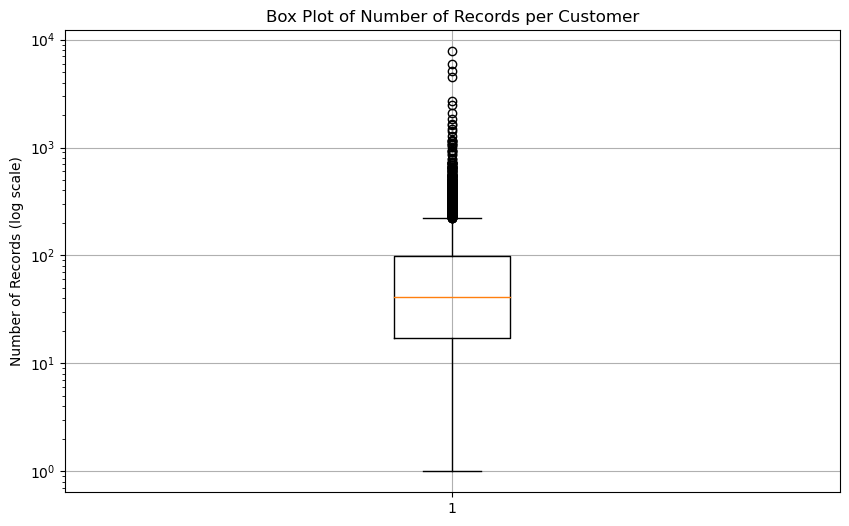

In [349]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(customer_records_count.values)
plt.yscale('log')
plt.ylabel('Number of Records (log scale)')
plt.title('Box Plot of Number of Records per Customer')
plt.grid(True)
plt.show()


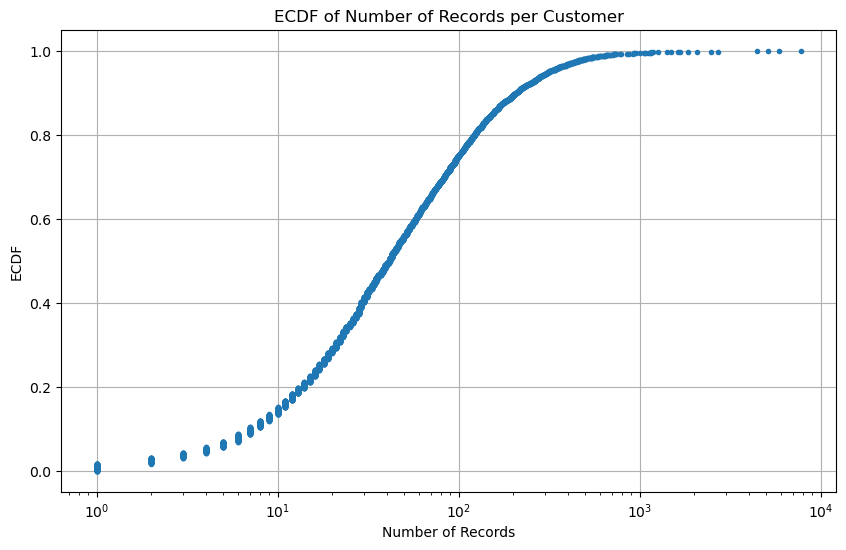

In [350]:
import numpy as np

# Compute ECDF
x = np.sort(customer_records_count.values)
y = np.arange(1, len(x) + 1) / len(x)

# Plot ECDF
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='none')
plt.xscale('log')
plt.xlabel('Number of Records')
plt.ylabel('ECDF')
plt.title('ECDF of Number of Records per Customer')
plt.grid(True)
plt.show()


In [351]:
invo_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Product,Img,Type,UnitPrice
0,536365,85123A,6,12/1/2010 8:26,17850,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
1,536373,85123A,6,12/1/2010 9:02,17850,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
2,536375,85123A,6,12/1/2010 9:32,17850,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
3,536390,85123A,64,12/1/2010 10:19,17511,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
4,536394,85123A,32,12/1/2010 10:39,13408,United Kingdom,"""Samsung QN82Q70TA 82"""" QLED Ultra High Resolu...",https://c1.neweggimages.com/ProductImageCompre...,Television,3195.98
...,...,...,...,...,...,...,...,...,...,...
533842,581266,23561,12,12/8/2011 11:25,12621,Germany,Fujifilm Instax Mini 9 Instant Camera - Flamin...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.71
533844,581581,23561,6,12/9/2011 12:20,17581,United Kingdom,Fujifilm Instax Mini 9 Instant Camera - Flamin...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.71
533847,580691,90214U,12,12/5/2011 15:48,13790,United Kingdom,2PCS Original Xiaomi Robotic Vacuum Cleaner Cl...,https://c1.neweggimages.com/ProductImageCompre...,Robotic Vacuums,10.99
533848,581483,23843,80995,12/9/2011 9:15,16446,United Kingdom,Waterproof Housing Case for Gopro MaxAction Ca...,https://c1.neweggimages.com/ProductImageCompre...,Camcorders,68.30


In [352]:
invo_df["CustomerID"].nunique()

4372

In [353]:
import pandas as pd

# Assuming you have merged_invoice_df DataFrame after previous operations

# Convert 'InvoiceDate' column to datetime format
invo_df['InvoiceDate'] = pd.to_datetime(invo_df['InvoiceDate'])

# Sort records by 'CustomerID' and 'InvoiceDate'
sorted_records = invo_df.sort_values(by=['CustomerID', 'InvoiceDate'])


sorted_records

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Product,Img,Type,UnitPrice
432674,541431,23166,74215,2011-01-18 10:01:00,12346,United Kingdom,Nikon 2199 SLR Lenses AF-S NIKKOR 50mm f/1.8G ...,https://c1.neweggimages.com/ProductImageCompre...,Camera Lenses,202.03
432675,C541433,23166,-74215,2011-01-18 10:17:00,12346,United Kingdom,Nikon 2199 SLR Lenses AF-S NIKKOR 50mm f/1.8G ...,https://c1.neweggimages.com/ProductImageCompre...,Camera Lenses,202.03
8232,537626,84969,6,2010-12-07 14:57:00,12347,Iceland,Apple iPhone 7 Plus 32GB Verizon Black MNR12LL/A,https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,529.97
12884,537626,22728,4,2010-12-07 14:57:00,12347,Iceland,1.2.4GHz wireless mouse optical mouse 2.50g Li...,https://c1.neweggimages.com/ProductImageCompre...,Gaming Mouse,17.83
13703,537626,22727,4,2010-12-07 14:57:00,12347,Iceland,Portable Bluetooth Speaker Waterproof Music Sp...,https://c1.neweggimages.com/ProductImageCompre...,Portable Speakers,17.99
...,...,...,...,...,...,...,...,...,...,...
515536,570715,23376,48,2011-10-12 10:23:00,18287,United Kingdom,Samsung Galaxy A10s (SM-A107F/DS) 32GB + 32GB ...,https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,140.99
515695,570715,23378,24,2011-10-12 10:23:00,18287,United Kingdom,"Samsung Galaxy A10s( A107F/DS) 6.2"" Display, 3...",https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,140.99
143001,573167,21824,48,2011-10-28 09:29:00,18287,United Kingdom,"Acer Aspire 5 A515-43-R19L 15.6"" Notebook - 19...",https://c1.neweggimages.com/ProductImageCompre...,Laptops,439.00
295931,573167,21014,24,2011-10-28 09:29:00,18287,United Kingdom,Nikon D5500 24MP DSLR Digital Camera AF-P 18-5...,https://c1.neweggimages.com/ProductImageCompre...,DSLR Cameras,759.99


In [354]:
sorted_records['Quantity'].value_counts()

Quantity
 1      69495
 12     59771
 2      57347
 6      37416
 4      32044
        ...  
-94         1
 162        1
-162        1
-67         1
-75         1
Name: count, Length: 436, dtype: int64

In [355]:
(sorted_records['Quantity'] < 0).sum()

8810

In [356]:
# Assuming you have sorted_records DataFrame after previous operations

# Check the date range of invoices
min_date = sorted_records['InvoiceDate'].min()
max_date = sorted_records['InvoiceDate'].max()

# Display the date range
print(f"Minimum Invoice Date: {min_date}")
print(f"Maximum Invoice Date: {max_date}")


Minimum Invoice Date: 2010-12-01 08:26:00
Maximum Invoice Date: 2011-12-09 12:50:00


In [357]:
sorted_record = sorted_records.drop_duplicates()

In [358]:
sorted_record['CustomerID'].nunique()

4372

In [359]:
sorted_record['InvoiceDate'].describe()

count                           401067
mean     2011-07-10 13:42:11.826104064
min                2010-12-01 08:26:00
25%                2011-04-06 16:47:00
50%                2011-07-29 17:19:00
75%                2011-10-20 12:03:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [360]:
from datetime import datetime
# Example date ranges
start_date_1 = datetime(2010, 12, 1)
end_date_1 = datetime(2011, 10, 10)

start_date_2 = datetime(2011, 10, 10)
end_date_2 = datetime(2011, 12, 9)

invoice_tr = sorted_record[
    (sorted_record['InvoiceDate'] < end_date_1) &
    (sorted_record['InvoiceDate'] >= start_date_1)
].reset_index(drop=True)

invoice_next = sorted_record[
    (sorted_record['InvoiceDate'] >= start_date_2) &
    (sorted_record['InvoiceDate'] < end_date_2)
].reset_index(drop=True)

In [361]:
invoice_tr['InvoiceDate'].nunique()

15385

In [362]:
invoice_next['InvoiceDate'].describe()

count                           117399
mean     2011-11-10 21:55:00.108859648
min                2011-10-10 08:23:00
25%                2011-10-27 14:22:00
50%                2011-11-11 12:53:00
75%                2011-11-24 14:09:00
max                2011-12-08 20:01:00
Name: InvoiceDate, dtype: object

In [363]:
invoice_user = pd.DataFrame(invoice_tr['CustomerID'].unique())
invoice_user.columns = ['CustomerID']

In [364]:
invoice_next_first_purchase = invoice_next.groupby('CustomerID').InvoiceDate.min().reset_index()
invoice_next_first_purchase.columns = ['CustomerID','MinPurchaseDate']
invoice_next_first_purchase

,CustomerID,MinPurchaseDate
0,12347,2011-10-31 12:25:00
1,12349,2011-11-21 09:51:00
2,12352,2011-11-03 14:37:00
3,12356,2011-11-17 08:40:00
4,12357,2011-11-06 16:07:00
...,...,...
2443,18276,2011-10-27 10:54:00
2444,18277,2011-10-12 15:22:00
2445,18282,2011-12-02 11:43:00
2446,18283,2011-10-27 14:38:00


In [365]:
invoice_last_purchase = invoice_tr.groupby('CustomerID').InvoiceDate.max().reset_index()
invoice_last_purchase.columns = ['CustomerID','MaxPurchaseDate']
invoice_last_purchase

,CustomerID,MaxPurchaseDate
0,12346,2011-01-18 10:17:00
1,12347,2011-08-02 08:48:00
2,12348,2011-09-25 13:13:00
3,12350,2011-02-02 16:01:00
4,12352,2011-09-28 14:58:00
...,...,...
3756,18280,2011-03-07 09:52:00
3757,18281,2011-06-12 10:53:00
3758,18282,2011-08-09 15:10:00
3759,18283,2011-09-05 12:35:00


In [366]:
invoice_purchase_dates = pd.merge(invoice_last_purchase,invoice_next_first_purchase,on='CustomerID',how='left')
invoice_purchase_dates['NextPurchaseDay'] = (invoice_purchase_dates['MinPurchaseDate'] - invoice_purchase_dates['MaxPurchaseDate']).dt.days

In [367]:
invoice_purchase_dates

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12346,2011-01-18 10:17:00,NaT,NaN
1,12347,2011-08-02 08:48:00,2011-10-31 12:25:00,90.0
2,12348,2011-09-25 13:13:00,NaT,NaN
3,12350,2011-02-02 16:01:00,NaT,NaN
4,12352,2011-09-28 14:58:00,2011-11-03 14:37:00,35.0
...,...,...,...,...
3756,18280,2011-03-07 09:52:00,NaT,NaN
3757,18281,2011-06-12 10:53:00,NaT,NaN
3758,18282,2011-08-09 15:10:00,2011-12-02 11:43:00,114.0
3759,18283,2011-09-05 12:35:00,2011-10-27 14:38:00,52.0


In [368]:
invoice_purchase_dates['NextPurchaseDay'].value_counts()

NextPurchaseDay
28.0     37
41.0     34
42.0     31
48.0     26
35.0     26
         ..
365.0     1
197.0     1
337.0     1
251.0     1
209.0     1
Name: count, Length: 307, dtype: int64

In [369]:
invoice_purchase_dates['NextPurchaseDay'].isna().sum()

1923

In [370]:
invoice_user = pd.merge(invoice_user, invoice_purchase_dates[['CustomerID','NextPurchaseDay']],on='CustomerID',how='left')

In [371]:
invoice_user

,CustomerID,NextPurchaseDay
0,12346,NaN
1,12347,90.0
2,12348,NaN
3,12350,NaN
4,12352,35.0
...,...,...
3756,18280,NaN
3757,18281,NaN
3758,18282,114.0
3759,18283,52.0


In [372]:
invoice_user.isnull().sum()

CustomerID            0
NextPurchaseDay    1923
dtype: int64

In [373]:
invoice_user = invoice_user.fillna(499)

Recency


In [374]:
invoice_max_purchase = invoice_tr.groupby('CustomerID').InvoiceDate.max().reset_index()

In [375]:
invoice_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [376]:
invoice_max_purchase['Recency'] = (invoice_max_purchase['MaxPurchaseDate'].max() - invoice_max_purchase['MaxPurchaseDate']).dt.days

In [377]:
invoice_user = pd.merge(invoice_user, invoice_max_purchase[['CustomerID','Recency']], on='CustomerID')

In [378]:
invoice_user

,CustomerID,NextPurchaseDay,Recency
0,12346,499.0,264
1,12347,90.0,68
2,12348,499.0,14
3,12350,499.0,249
4,12352,35.0,11
...,...,...,...
3756,18280,499.0,216
3757,18281,499.0,119
3758,18282,114.0,61
3759,18283,52.0,34


In [379]:
invoice_user.Recency.describe()

count    3761.000000
mean       92.366658
std        89.695942
min         0.000000
25%        17.000000
50%        59.000000
75%       150.000000
max       312.000000
Name: Recency, dtype: float64

In [380]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyoff

# Assuming you have already defined 'invoice_user' and 'Recency' column

plot_data = [
    go.Histogram(
        x=invoice_user['Recency']
    )
]

plot_layout = go.Layout(
    title='Recency'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/3929697111.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/3929697111.py:9: SettingWithCopyWarning:


A value is tryin

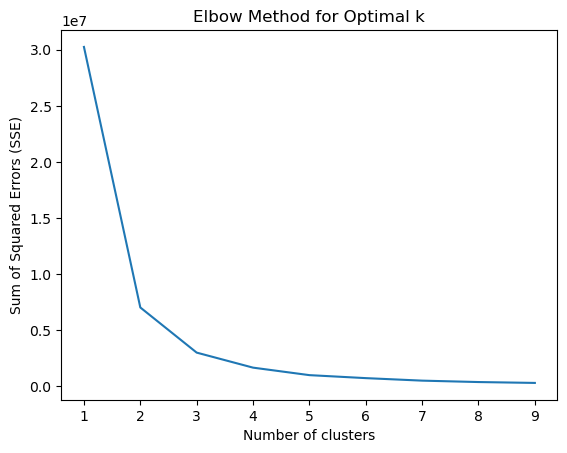

In [381]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = {}
invoice_recency = invoice_user[['Recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(invoice_recency)
    invoice_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [382]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(invoice_user[['Recency']])
invoice_user['RecencyCluster'] = kmeans.predict(invoice_user[['Recency']])

/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [383]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [384]:
invoice_user = order_cluster('RecencyCluster', 'Recency',invoice_user,False)

In [385]:
invoice_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,425.0,274.762353,28.033967,228.0,250.0,271.0,304.0,312.0
1,611.0,180.949264,26.113919,139.0,156.0,181.0,203.0,227.0
2,851.0,95.568743,23.119453,59.0,75.0,94.0,115.0,138.0
3,1874.0,20.665955,15.852007,0.0,7.0,17.0,31.0,58.0


Frequency

In [386]:
invoice_frequency = invoice_tr.groupby('CustomerID').InvoiceDate.count().reset_index()

In [387]:
invoice_frequency.columns = ['CustomerID','Frequency']

In [388]:
invoice_frequency


,CustomerID,Frequency
0,12346,2
1,12347,124
2,12348,31
3,12350,17
4,12352,77
...,...,...
3756,18280,10
3757,18281,7
3758,18282,8
3759,18283,424


In [389]:
invoice_user = pd.merge(invoice_user, invoice_frequency, on='CustomerID')

In [390]:
invoice_user

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,12346,499.0,264,0,2
1,12350,499.0,249,0,17
2,12365,499.0,230,0,23
3,12373,499.0,250,0,14
4,12377,499.0,254,0,77
...,...,...,...,...,...
3756,18239,499.0,157,1,88
3757,18246,209.0,172,1,2
3758,18270,202.0,179,1,7
3759,18280,499.0,216,1,10


In [391]:
 invoice_user.Frequency.describe()

count    3761.000000
mean       75.259505
std       164.228966
min         1.000000
25%        15.000000
50%        35.000000
75%        83.000000
max      5209.000000
Name: Frequency, dtype: float64

In [392]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

plot_data = [
    go.Histogram(
        x=invoice_user.query('Frequency < 1000')['Frequency']
    )
]

plot_layout = go.Layout(
    title='Frequency'
)

fig = go.Figure(data=plot_data, layout=plot_layout)

# Display the figure using plotly.io
pio.show(fig)


/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/1328123255.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/1328123255.py:5: SettingWithCopyWarning:


A value is tryin

/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/1328123255.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/1328123255.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Use

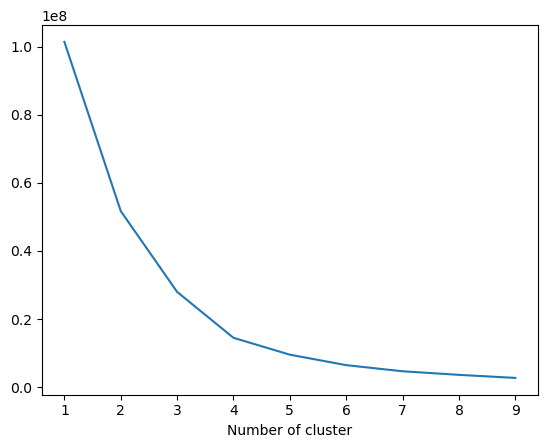

In [393]:
sse={}
invoice_frequency = invoice_user[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(invoice_frequency)
    invoice_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [394]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(invoice_user[['Frequency']])
invoice_user['FrequencyCluster'] = kmeans.predict(invoice_user[['Frequency']])

/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [395]:
invoice_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3348.0,42.225806,37.188508,1.0,14.0,29.0,61.00,158.0
1,2.0,4537.000000,950.351514,3865.0,4201.0,4537.0,4873.00,5209.0
2,391.0,274.874680,107.149774,159.0,194.5,239.0,338.00,743.0
3,20.0,1256.450000,483.960033,779.0,898.0,1104.5,1427.25,2428.0


In [396]:
invoice_user = order_cluster('FrequencyCluster', 'Frequency',invoice_user,True)

Monetary Value

In [397]:
invoice_tr['Revenue'] = invoice_tr['UnitPrice'] * invoice_tr['Quantity']

In [398]:
invoice_revenue = invoice_tr.groupby('CustomerID').Revenue.sum().reset_index()

In [399]:
invoice_revenue

,CustomerID,Revenue
0,12346,0.00
1,12347,1085038.72
2,12348,1839896.72
3,12350,126060.98
4,12352,492339.53
...,...,...
3756,18280,11584.27
3757,18281,28090.57
3758,18282,28218.42
3759,18283,649194.28


In [400]:
invoice_user = pd.merge(invoice_user, invoice_revenue, on='CustomerID')

In [401]:
invoice_user.Revenue.describe()

count    3.761000e+03
mean     8.266328e+05
std      3.270515e+06
min     -1.439856e+06
25%      9.475400e+04
50%      2.419511e+05
75%      6.661495e+05
max      1.074352e+08
Name: Revenue, dtype: float64

In [402]:
plot_data = [
    go.Histogram(
        x=invoice_user.query('Revenue < 1000000')['Revenue']
    )
]

plot_layout = go.Layout(
        title='Monetary Value'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/2019715827.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/2019715827.py:5: SettingWithCopyWarning:


A value is tryin

/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/2019715827.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/2019715827.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Use

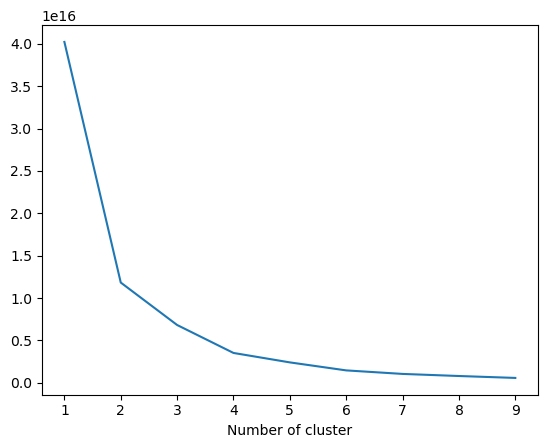

In [403]:
sse={}
invoice_revenue = invoice_user[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(invoice_revenue)
    invoice_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [404]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(invoice_user[['Revenue']])
invoice_user['RevenueCluster'] = kmeans.predict(invoice_user[['Revenue']])

/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [405]:
invoice_user = order_cluster('RevenueCluster', 'Revenue',invoice_user,True)

In [406]:
invoice_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3625.0,4.592242e+05,5.790636e+05,-1.439856e+06,9.173710e+04,2.283520e+05,6.043561e+05,3.182529e+06
1,117.0,5.949241e+06,2.983228e+06,3.228468e+06,3.904160e+06,4.876309e+06,6.809564e+06,1.961164e+07
2,18.0,3.559900e+07,8.681930e+06,2.344430e+07,2.902284e+07,3.426094e+07,4.052613e+07,5.369093e+07
3,1.0,1.074352e+08,NaN,1.074352e+08,1.074352e+08,1.074352e+08,1.074352e+08,1.074352e+08


Segmentation

In [407]:
invoice_user.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,12346,499.0,264,0,2,0,0.00,0
1,12350,499.0,249,0,17,0,126060.98,0
2,12365,499.0,230,0,23,0,118857.53,0
3,12373,499.0,250,0,14,0,324618.36,0
4,12377,499.0,254,0,77,0,907400.30,0


In [408]:
invoice_user.columns

Index(['CustomerID', 'NextPurchaseDay', 'Recency', 'RecencyCluster',
       'Frequency', 'FrequencyCluster', 'Revenue', 'RevenueCluster'],
      dtype='object')

In [409]:
invoice_user['OverallScore'] = invoice_user['RecencyCluster'] + invoice_user['FrequencyCluster'] + invoice_user['RevenueCluster']

In [410]:
invoice_user.groupby('OverallScore')[['Recency', 'Frequency', 'Revenue']].mean()


,Recency,Frequency,Revenue
OverallScore,,,
0,275.009501,21.646081,1.453287e+05
1,181.347039,28.345395,2.290828e+05
2,96.755886,41.707559,3.645050e+05
3,23.841103,59.140512,5.297089e+05
4,19.091503,244.267974,2.086276e+06
5,13.438356,374.726027,6.635266e+06
6,6.933333,880.733333,2.396616e+07
7,4.833333,2034.833333,3.116380e+07
8,2.500000,2727.000000,6.917392e+07


In [411]:
invoice_user.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
0,12346,499.0,264,0,2,0,0.00,0,0
1,12350,499.0,249,0,17,0,126060.98,0,0
2,12365,499.0,230,0,23,0,118857.53,0,0
3,12373,499.0,250,0,14,0,324618.36,0,0
4,12377,499.0,254,0,77,0,907400.30,0,0


In [412]:
invoice_user['OverallScore'].value_counts()


OverallScore
3    1523
2     807
1     608
0     421
4     306
5      73
6      15
7       6
8       2
Name: count, dtype: int64

In [413]:
invoice_user.groupby('OverallScore')['Recency'].count()

OverallScore
0     421
1     608
2     807
3    1523
4     306
5      73
6      15
7       6
8       2
Name: Recency, dtype: int64

In [414]:
invoice_user['Segment'] = 'Low-Value'
invoice_user.loc[invoice_user['OverallScore']>2,'Segment'] = 'Mid-Value'
invoice_user.loc[invoice_user['OverallScore']>4,'Segment'] = 'High-Value'

In [415]:
invoice_user.Frequency.describe()

count    3761.000000
mean       75.259505
std       164.228966
min         1.000000
25%        15.000000
50%        35.000000
75%        83.000000
max      5209.000000
Name: Frequency, dtype: float64

In [416]:
invoice_user.Revenue.describe()

count    3.761000e+03
mean     8.266328e+05
std      3.270515e+06
min     -1.439856e+06
25%      9.475400e+04
50%      2.419511e+05
75%      6.661495e+05
max      1.074352e+08
Name: Revenue, dtype: float64

In [418]:
invoice_user.to_csv('invoice_user.csv', index=False)

In [ ]:
invoice_graph = invoice_user.query("Revenue < 5000000 and Frequency < 3000")

plot_data = [
    go.Scatter(
        x=invoice_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=invoice_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Infrequent Shoppers',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=invoice_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=invoice_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Value-Conscious Shoppers',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=invoice_graph.query("Segment == 'High-Value'")['Frequency'],
        y=invoice_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='Devoted Customers',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
invoice_graph = invoice_user.query("Revenue < 5000000 and Frequency < 3000")

plot_data = [
    go.Scatter(
        x=invoice_graph.query("Segment == 'Low-Value'")['Recency'],
        y=invoice_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Infrequent Shoppers',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=invoice_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=invoice_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Value-Conscious Shoppers',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=invoice_graph.query("Segment == 'High-Value'")['Recency'],
        y=invoice_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
invoice_graph = invoice_user.query("Revenue < 5000000 and Frequency < 3000")

plot_data = [
    go.Scatter(
        x=invoice_graph.query("Segment == 'Low-Value'")['Recency'],
        y=invoice_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Infrequent Shoppers',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=invoice_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=invoice_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Value-Conscious Shoppers',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=invoice_graph.query("Segment == 'High-Value'")['Recency'],
        y=invoice_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='Devoted Customers',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
invoice_user

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,12346,499.0,264,0,2,0,0.000000e+00,0,0,Low-Value
1,12350,499.0,249,0,17,0,1.260610e+05,0,0,Low-Value
2,12365,499.0,230,0,23,0,1.188575e+05,0,0,Low-Value
3,12373,499.0,250,0,14,0,3.246184e+05,0,0,Low-Value
4,12377,499.0,254,0,77,0,9.074003e+05,0,0,Low-Value
...,...,...,...,...,...,...,...,...,...,...
3756,14298,19.0,11,3,1384,2,3.116502e+07,2,7,High-Value
3757,15311,4.0,1,3,1990,2,3.369531e+07,2,7,High-Value
3758,17511,19.0,3,3,836,2,4.197035e+07,2,7,High-Value
3759,14911,3.0,2,3,3865,3,3.091265e+07,2,8,High-Value


Adding New Features

In [ ]:
invoice_tr

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Product,Img,Type,UnitPrice,Revenue
0,541431,23166,74215,2011-01-18 10:01:00,12346,United Kingdom,Nikon 2199 SLR Lenses AF-S NIKKOR 50mm f/1.8G ...,https://c1.neweggimages.com/ProductImageCompre...,Camera Lenses,202.03,14993656.45
1,C541433,23166,-74215,2011-01-18 10:17:00,12346,United Kingdom,Nikon 2199 SLR Lenses AF-S NIKKOR 50mm f/1.8G ...,https://c1.neweggimages.com/ProductImageCompre...,Camera Lenses,202.03,-14993656.45
2,537626,84969,6,2010-12-07 14:57:00,12347,Iceland,Apple iPhone 7 Plus 32GB Verizon Black MNR12LL/A,https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,529.97,3179.82
3,537626,22728,4,2010-12-07 14:57:00,12347,Iceland,1.2.4GHz wireless mouse optical mouse 2.50g Li...,https://c1.neweggimages.com/ProductImageCompre...,Gaming Mouse,17.83,71.32
4,537626,22727,4,2010-12-07 14:57:00,12347,Iceland,Portable Bluetooth Speaker Waterproof Music Sp...,https://c1.neweggimages.com/ProductImageCompre...,Portable Speakers,17.99,71.96
...,...,...,...,...,...,...,...,...,...,...,...
283046,554065,85039B,12,2011-05-22 10:39:00,18287,United Kingdom,HP Bilingual Laptop 15-dy1018 Intel Core i5 10...,https://c1.neweggimages.com/ProductImageCompre...,Laptops,579.99,6959.88
283047,554065,21382,18,2011-05-22 10:39:00,18287,United Kingdom,Supersonic IQ-1306BT Bluetooth Portable Speake...,https://c1.neweggimages.com/ProductImageCompre...,Portable Speakers,29.95,539.10
283048,554065,84584,6,2011-05-22 10:39:00,18287,United Kingdom,"Dell LAT E6420 Laptop, Core i5-2520m, 2.5 GHz,...",https://c1.neweggimages.com/ProductImageCompre...,Laptops,387.00,2322.00
283049,554065,23076,24,2011-05-22 10:39:00,18287,United Kingdom,Opteka 85mm f/1.8 Manual Focus Portrait Teleph...,https://c1.neweggimages.com/ProductImageCompre...,Camera Lenses,109.00,2616.00


In [ ]:
# Creating df with CustomerID, Invoice Date
invoice_day_order = invoice_tr[['CustomerID','InvoiceDate']]

In [ ]:
# Convert Invoice Datetime to day
invoice_day_order.loc[:, 'InvoiceDay'] = invoice_tr['InvoiceDate'].dt.date


/var/folders/y2/br79px_15136xbncpfmssymr0000gn/T/ipykernel_87657/3165906863.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
invoice_day_order

,CustomerID,InvoiceDate,InvoiceDay
0,12346,2011-01-18 10:01:00,2011-01-18
1,12346,2011-01-18 10:17:00,2011-01-18
2,12347,2010-12-07 14:57:00,2010-12-07
3,12347,2010-12-07 14:57:00,2010-12-07
4,12347,2010-12-07 14:57:00,2010-12-07
...,...,...,...
283046,18287,2011-05-22 10:39:00,2011-05-22
283047,18287,2011-05-22 10:39:00,2011-05-22
283048,18287,2011-05-22 10:39:00,2011-05-22
283049,18287,2011-05-22 10:39:00,2011-05-22


In [ ]:
invoice_day_order = invoice_day_order.sort_values(['CustomerID','InvoiceDay'])

In [ ]:
#Drop duplicates
invoice_day_order = invoice_day_order.drop_duplicates(subset=['CustomerID','InvoiceDay'],keep='first')

In [ ]:
invoice_day_order

,CustomerID,InvoiceDate,InvoiceDay
0,12346,2011-01-18 10:01:00,2011-01-18
2,12347,2010-12-07 14:57:00,2010-12-07
33,12347,2011-01-26 14:30:00,2011-01-26
62,12347,2011-04-07 10:43:00,2011-04-07
86,12347,2011-06-09 13:01:00,2011-06-09
...,...,...,...
282822,18283,2011-06-14 11:41:00,2011-06-14
282846,18283,2011-06-23 19:20:00,2011-06-23
282922,18283,2011-07-14 13:00:00,2011-07-14
282977,18283,2011-09-05 12:35:00,2011-09-05


In [ ]:
#shifting last 3 purchase dates
invoice_day_order['PrevInvoiceDate'] = invoice_day_order.groupby('CustomerID')['InvoiceDay'].shift(1)
invoice_day_order['T2InvoiceDate'] = invoice_day_order.groupby('CustomerID')['InvoiceDay'].shift(2)
#invoice_day_order['T3InvoiceDate'] = invoice_day_order.groupby('CustomerID')['InvoiceDay'].shift(3)

In [ ]:
invoice_day_order

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate
0,12346,2011-01-18 10:01:00,2011-01-18,NaN,NaN
2,12347,2010-12-07 14:57:00,2010-12-07,NaN,NaN
33,12347,2011-01-26 14:30:00,2011-01-26,2010-12-07,NaN
62,12347,2011-04-07 10:43:00,2011-04-07,2011-01-26,2010-12-07
86,12347,2011-06-09 13:01:00,2011-06-09,2011-04-07,2011-01-26
...,...,...,...,...,...
282822,18283,2011-06-14 11:41:00,2011-06-14,2011-05-23,2011-04-21
282846,18283,2011-06-23 19:20:00,2011-06-23,2011-06-14,2011-05-23
282922,18283,2011-07-14 13:00:00,2011-07-14,2011-06-23,2011-06-14
282977,18283,2011-09-05 12:35:00,2011-09-05,2011-07-14,2011-06-23


In [ ]:
# Convert columns to datetime format
invoice_day_order['InvoiceDay'] = pd.to_datetime(invoice_day_order['InvoiceDay'])
invoice_day_order['PrevInvoiceDate'] = pd.to_datetime(invoice_day_order['PrevInvoiceDate'])
invoice_day_order['T2InvoiceDate'] = pd.to_datetime(invoice_day_order['T2InvoiceDate'])
#invoice_day_order['T3InvoiceDate'] = pd.to_datetime(invoice_day_order['T3InvoiceDate'])

# Calculate day differences
invoice_day_order['DayDiff'] = (invoice_day_order['InvoiceDay'] - invoice_day_order['PrevInvoiceDate']).dt.days
invoice_day_order['DayDiff2'] = (invoice_day_order['InvoiceDay'] - invoice_day_order['T2InvoiceDate']).dt.days
#invoice_day_order['DayDiff3'] = (invoice_day_order['InvoiceDay'] - invoice_day_order['T3InvoiceDate']).dt.days


In [ ]:
invoice_day_order

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,DayDiff,DayDiff2
0,12346,2011-01-18 10:01:00,2011-01-18,NaT,NaT,NaN,NaN
2,12347,2010-12-07 14:57:00,2010-12-07,NaT,NaT,NaN,NaN
33,12347,2011-01-26 14:30:00,2011-01-26,2010-12-07,NaT,50.0,NaN
62,12347,2011-04-07 10:43:00,2011-04-07,2011-01-26,2010-12-07,71.0,121.0
86,12347,2011-06-09 13:01:00,2011-06-09,2011-04-07,2011-01-26,63.0,134.0
...,...,...,...,...,...,...,...
282822,18283,2011-06-14 11:41:00,2011-06-14,2011-05-23,2011-04-21,22.0,54.0
282846,18283,2011-06-23 19:20:00,2011-06-23,2011-06-14,2011-05-23,9.0,31.0
282922,18283,2011-07-14 13:00:00,2011-07-14,2011-06-23,2011-06-14,21.0,30.0
282977,18283,2011-09-05 12:35:00,2011-09-05,2011-07-14,2011-06-23,53.0,74.0


In [ ]:
invoice_day_diff = invoice_day_order.groupby('CustomerID').agg({'DayDiff': ['mean','std']}).reset_index()

In [ ]:
invoice_day_diff.columns = ['CustomerID', 'DayDiffMean','DayDiffStd']

In [ ]:
invoice_day_diff

,CustomerID,DayDiffMean,DayDiffStd
0,12346,NaN,NaN
1,12347,59.500000,9.398581
2,12348,94.333333,69.759109
3,12350,NaN,NaN
4,12352,44.800000,76.816014
...,...,...,...
3756,18280,NaN,NaN
3757,18281,NaN,NaN
3758,18282,4.000000,NaN
3759,18283,30.250000,16.069047


In [ ]:
invoice_day_order_last = invoice_day_order.drop_duplicates(subset=['CustomerID'],keep='last')
invoice_day_order_last

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,DayDiff,DayDiff2
0,12346,2011-01-18 10:01:00,2011-01-18,NaT,NaT,NaN,NaN
104,12347,2011-08-02 08:48:00,2011-08-02,2011-06-09,2011-04-07,54.0,117.0
154,12348,2011-09-25 13:13:00,2011-09-25,2011-04-05,2011-01-25,173.0,243.0
157,12350,2011-02-02 16:01:00,2011-02-02,NaT,NaT,NaN,NaN
237,12352,2011-09-28 14:58:00,2011-09-28,2011-09-20,2011-03-22,8.0,190.0
...,...,...,...,...,...,...,...
282575,18280,2011-03-07 09:52:00,2011-03-07,NaT,NaT,NaN,NaN
282585,18281,2011-06-12 10:53:00,2011-06-12,NaT,NaT,NaN,NaN
282599,18282,2011-08-09 15:10:00,2011-08-09,2011-08-05,NaT,4.0,NaN
282977,18283,2011-09-05 12:35:00,2011-09-05,2011-07-14,2011-06-23,53.0,74.0


In [ ]:
invoice_day_order_last = invoice_day_order_last.dropna()

In [ ]:
invoice_day_order_last = pd.merge(invoice_day_order_last, invoice_day_diff, on='CustomerID')

In [ ]:
invoice_day_order_last

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,DayDiff,DayDiff2,DayDiffMean,DayDiffStd
0,12347,2011-08-02 08:48:00,2011-08-02,2011-06-09,2011-04-07,54.0,117.0,59.500000,9.398581
1,12348,2011-09-25 13:13:00,2011-09-25,2011-04-05,2011-01-25,173.0,243.0,94.333333,69.759109
2,12352,2011-09-28 14:58:00,2011-09-28,2011-09-20,2011-03-22,8.0,190.0,44.800000,76.816014
3,12359,2011-06-03 12:26:00,2011-06-03,2011-04-13,2011-02-07,51.0,116.0,47.333333,19.756855
4,12362,2011-09-28 12:04:00,2011-09-28,2011-08-19,2011-08-11,40.0,48.0,37.166667,26.528601
...,...,...,...,...,...,...,...,...,...
1639,18248,2011-08-18 06:14:00,2011-08-18,2011-08-17,2011-08-09,1.0,9.0,24.333333,34.530180
1640,18257,2011-10-03 14:53:00,2011-10-03,2011-08-17,2011-06-24,47.0,101.0,28.625000,25.246994
1641,18260,2011-06-20 12:37:00,2011-06-20,2011-05-23,2011-05-18,28.0,33.0,26.571429,15.608301
1642,18272,2011-08-18 12:06:00,2011-08-18,2011-07-12,2011-05-11,37.0,99.0,33.250000,21.608255


In [ ]:
invoice_user = pd.merge(
    invoice_user,
    invoice_day_order_last[['CustomerID']],
    on='CustomerID',  # Assuming 'CustomerID' is the common column for merging
    how='inner'
)


In [ ]:
invoice_user

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,12578,295.0,255,0,76,0,6.910961e+05,0,0,Low-Value
1,12829,499.0,261,0,12,0,9.655296e+04,0,0,Low-Value
2,12967,298.0,240,0,20,0,9.986136e+05,0,0,Low-Value
3,13329,322.0,293,0,9,0,9.590879e+04,0,0,Low-Value
4,13506,499.0,251,0,29,0,1.829245e+05,0,0,Low-Value
...,...,...,...,...,...,...,...,...,...,...
1639,14298,19.0,11,3,1384,2,3.116502e+07,2,7,High-Value
1640,15311,4.0,1,3,1990,2,3.369531e+07,2,7,High-Value
1641,17511,19.0,3,3,836,2,4.197035e+07,2,7,High-Value
1642,14911,3.0,2,3,3865,3,3.091265e+07,2,8,High-Value


Grouping Label

In [ ]:
invoice_class = invoice_user.copy()

In [ ]:
invoice_class = pd.get_dummies(invoice_class)

In [ ]:
invoice_class

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,12578,295.0,255,0,76,0,6.910961e+05,0,0,False,True,False
1,12829,499.0,261,0,12,0,9.655296e+04,0,0,False,True,False
2,12967,298.0,240,0,20,0,9.986136e+05,0,0,False,True,False
3,13329,322.0,293,0,9,0,9.590879e+04,0,0,False,True,False
4,13506,499.0,251,0,29,0,1.829245e+05,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1639,14298,19.0,11,3,1384,2,3.116502e+07,2,7,True,False,False
1640,15311,4.0,1,3,1990,2,3.369531e+07,2,7,True,False,False
1641,17511,19.0,3,3,836,2,4.197035e+07,2,7,True,False,False
1642,14911,3.0,2,3,3865,3,3.091265e+07,2,8,True,False,False


In [ ]:
invoice_user.NextPurchaseDay.describe()

count    1644.000000
mean      198.066302
std       206.458188
min         0.000000
25%        39.000000
50%        75.000000
75%       499.000000
max       499.000000
Name: NextPurchaseDay, dtype: float64

In [ ]:
invoice_class['NextPurchaseDayRange'] = 2
invoice_class.loc[invoice_class.NextPurchaseDay>20,'NextPurchaseDayRange'] = 1
invoice_class.loc[invoice_class.NextPurchaseDay>50,'NextPurchaseDayRange'] = 0

In [ ]:
invoice_class.NextPurchaseDayRange.value_counts()/len(invoice_user)

NextPurchaseDayRange
0    0.640511
1    0.251217
2    0.108273
Name: count, dtype: float64

<AxesSubplot:>

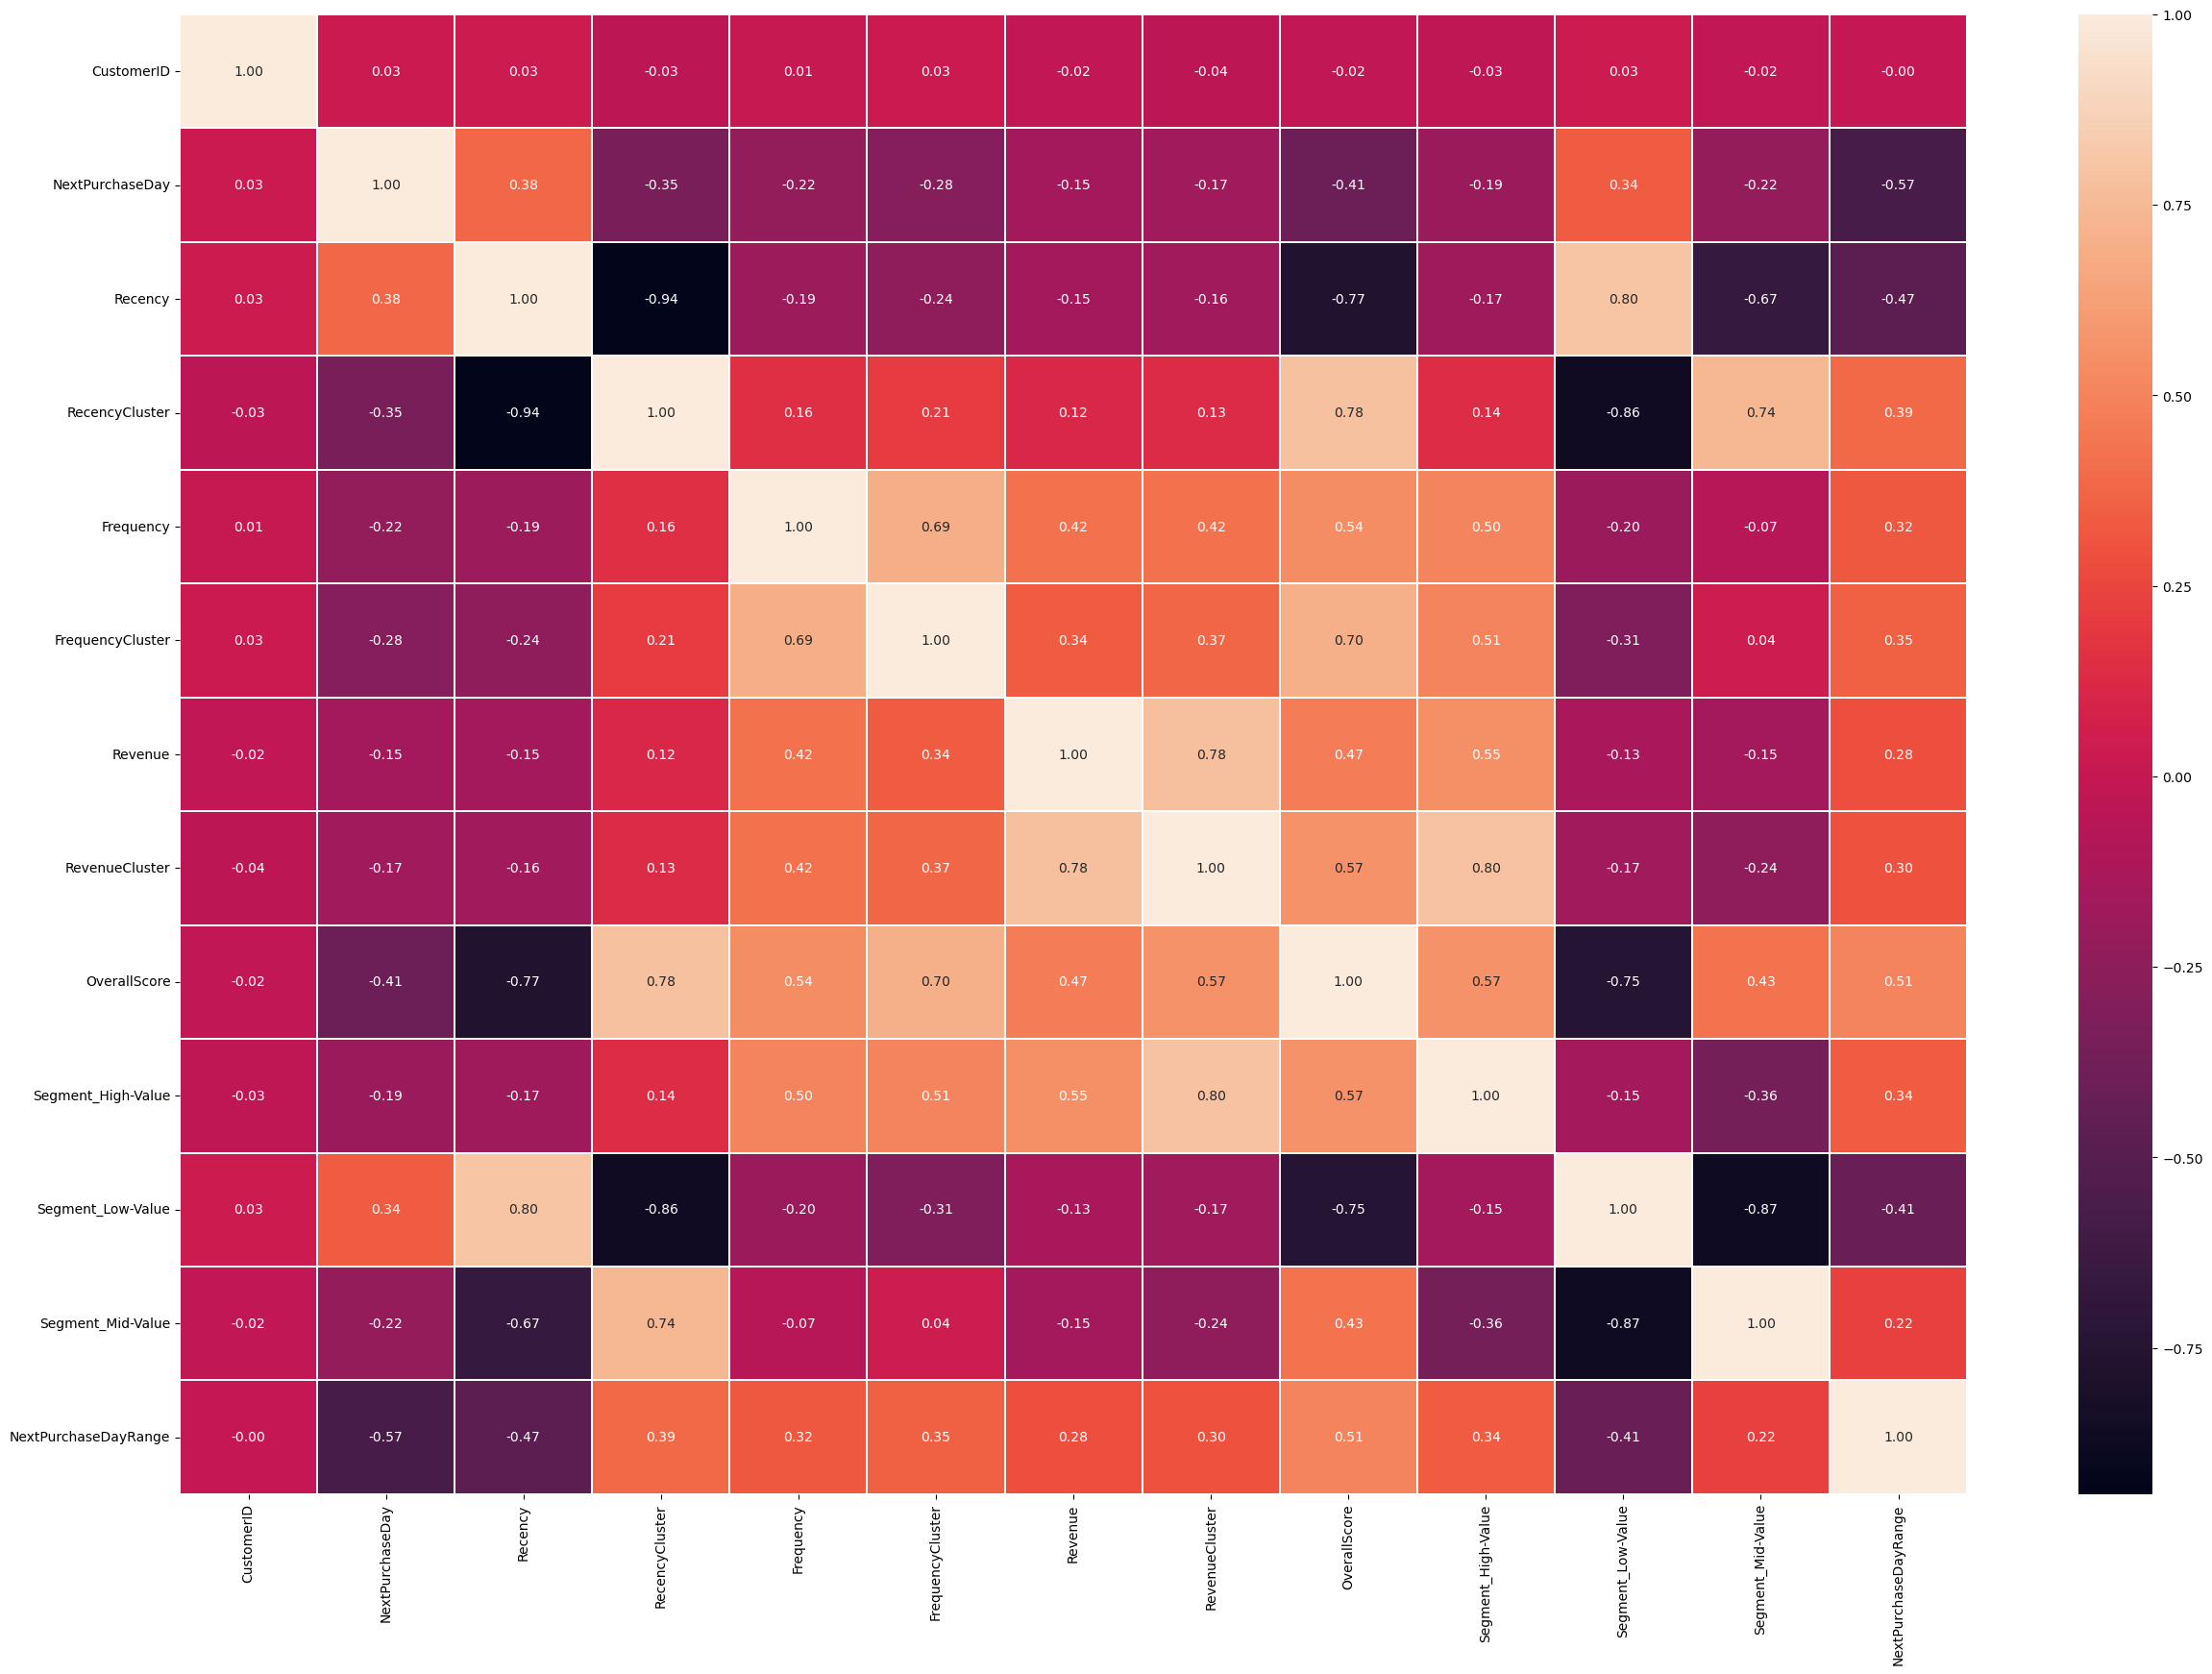

In [ ]:
import seaborn as sns
corr = invoice_class[invoice_class.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

In [ ]:
invoice_class = invoice_class.drop('NextPurchaseDay',axis=1)

In [ ]:
invoice_class

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,12578,255,0,76,0,6.910961e+05,0,0,False,True,False,0
1,12829,261,0,12,0,9.655296e+04,0,0,False,True,False,0
2,12967,240,0,20,0,9.986136e+05,0,0,False,True,False,0
3,13329,293,0,9,0,9.590879e+04,0,0,False,True,False,0
4,13506,251,0,29,0,1.829245e+05,0,0,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1639,14298,11,3,1384,2,3.116502e+07,2,7,True,False,False,2
1640,15311,1,3,1990,2,3.369531e+07,2,7,True,False,False,2
1641,17511,3,3,836,2,4.197035e+07,2,7,True,False,False,2
1642,14911,2,3,3865,3,3.091265e+07,2,8,True,False,False,2


In [ ]:
invoice_class.columns

Index(['CustomerID', 'Recency', 'RecencyCluster', 'Frequency',
       'FrequencyCluster', 'Revenue', 'RevenueCluster', 'OverallScore',
       'Segment_High-Value', 'Segment_Low-Value', 'Segment_Mid-Value',
       'NextPurchaseDayRange'],
      dtype='object')

In [ ]:
invoice_class.to_csv('invoice_class.csv',index=False)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))
# Assuming 'invoice_class' DataFrame is defined

# Drop the target variable from the features
X = invoice_class.drop('NextPurchaseDayRange', axis=1)
y = invoice_class['NextPurchaseDayRange']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Define a list of models
models = [
    ("LR", LogisticRegression()),
    ("NB", GaussianNB()),
    ("RF", RandomForestClassifier()),
    ("SVC", SVC()),
    ("Dtree", DecisionTreeClassifier()),
    ("XGB", xgb.XGBClassifier()),
    ("KNN", KNeighborsClassifier())
]

# Iterate through each model
for name, model in models:
    kfold = KFold(n_splits=2, shuffle=True, random_state=22)  # Set shuffle=True
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")

    # Fit the model on the entire training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print the name of the model and its cross-validation results
    print(name, "Cross-Validation Accuracy:", cv_result)

    # Additional evaluation metrics can be printed or calculated here

    # Example: Print accuracy on the test set
    from sklearn.metrics import accuracy_score
    accuracy_on_test = accuracy_score(y_test, y_pred)
    print(name, "Test Set Accuracy:", accuracy_on_test)


/Users/baluooj/anaconda3/envs/my_environment/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR Cross-Validation Accuracy: [0.63304348 0.73217391]
LR Test Set Accuracy: 0.6680161943319838
NB Cross-Validation Accuracy: [0.63826087 0.68173913]
NB Test Set Accuracy: 0.6842105263157895
RF Cross-Validation Accuracy: [0.67826087 0.70782609]
RF Test Set Accuracy: 0.6882591093117408
SVC Cross-Validation Accuracy: [0.62086957 0.66956522]
SVC Test Set Accuracy: 0.6700404858299596
Dtree Cross-Validation Accuracy: [0.65391304 0.66782609]
Dtree Test Set Accuracy: 0.6963562753036437
XGB Cross-Validation Accuracy: [0.67478261 0.69217391]
XGB Test Set Accuracy: 0.6983805668016194
KNN Cross-Validation Accuracy: [0.6173913  0.67130435]
KNN Test Set Accuracy: 0.6376518218623481


In [ ]:


# Define the RandomForestClassifier and train it separately
rf_model = RandomForestClassifier(random_state=22)
rf_model.fit(X_train, y_train)

# Make predictions on the test set using RandomForestClassifier
rf_predictions = rf_model.predict(X_test)

# Evaluate the performance of RandomForestClassifier
from sklearn.metrics import accuracy_score
print("Classification from RandomForestClassifier:", rf_predictions)

# Define the XGBClassifier and train it separately
xgb_model = xgb.XGBClassifier(random_state=22)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set using XGBClassifier
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the performance of XGBClassifier
print("Classification from XGBClassifier:", xgb_predictions)


Classification from RandomForestClassifier: [0 0 1 0 0 1 0 1 0 0 0 0 0 2 0 2 0 0 0 0 1 2 1 0 1 0 1 1 2 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 2 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 2 1 0 0 0 0 1 1 0 0 0
 0 0 1 2 0 0 1 0 1 1 0 0 1 0 2 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 1 2 0 1 0 1 0 1 0 0 1 0 2 0 1 2 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0
 0 0 2 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 2 2 0 1 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 1 0 1 0 0 2 0 0 0 0 0 1 0 0 1 2 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 1 2 0 0 1 0 0 1 0 0 1 0 0 2 1 1 0 0 2 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 2 0 0 0 0 0 0 0 2 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 0 0 2 0 0 1 1 0 0 0 2 0 2 0 0 0 1 0 0 0 0 0 2 0 0 2 0 0 1 2 2 0 0 2 0
 0 2 0 0 1 0 0 0 0 0 0 1 0 1 0 1 2 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0
 1 1 0 0 0 1 1 0 2 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 2 0 1 0 0 2 0 0 1
 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 2 0 1 1 0 1 0 0 0

In [ ]:
X.size

18084

In [ ]:
y_test.size

494

In [ ]:
X_test.to_csv('X_test.csv', index=False)